In [1]:
import pandas as pd
from IPython.display import display

In [2]:
orders = pd.read_csv("./Data/order.csv", header=0, index_col=0)
products = pd.read_csv("./Data/product.csv", header=0, index_col=0, 
    dtype={
        'category': 'Int32',
        'collection': 'Int32',
        'color': 'Int32',
        'metal': 'Int32',  # Specify types explicitly if needed
    }
)

In [3]:
display(orders.head(3))
display(products.head(3))

,order_id,sellout_date,consumer_id,quantity,net_value_dkk,store_id,store_type,product_id_with_size
0,de0fbd052164054f6aa62a14625337b0,2023-12-27,NaN,1,590.45,6c8f91e81311301bdfc31c68e6ea2643,Shop In Shop,d307ea27829de6c0493d8b20a94506d9
1,64bede113cd02f8497ddeaacac18835e,2023-06-26,NaN,1,559.04,c9c0aff4a85fc94c618b692817050846,Shop In Shop,63c7b0a952129ef1160c2a867b090cbf
2,ebf46c3554707c805de743b3a61151ff,2023-10-05,NaN,1,299.47,ba675792158e38a9bd33cdc0423883a7,Shop In Shop,770c44d919873b4ba94d44d7111f2684


,product_id_with_size,product_id,category,collection,color,metal,theme
0,d76e06a9b00623337577fb72771a481f,a53f0b462ce67ce8a78eee97c09f3ac0,26,18,111,23,NaN
1,da3b9e7fac023b0fcae1ab482f305c58,1215d9f29f80d692efe96e3e938422fc,26,29,35,6,NaN
2,bc22b32ec2d8d65885ada9cb97a52b27,1215d9f29f80d692efe96e3e938422fc,26,29,35,6,NaN


Orders

In [4]:
print("Shape")
display(orders.shape)
print()

print("Info")
orders.info()
print()

print("Describe")
display(orders.describe())
print()

print("Nulls")
display(orders.isnull().sum())
print()

print("correlations")
for tmp_cor in ["pearson", "kendall"]:
    display(orders[["quantity", "net_value_dkk"]].corr(method=tmp_cor))
print()

Shape


(916074, 8)


Info
<class 'pandas.core.frame.DataFrame'>
Index: 916074 entries, 0 to 916073
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              916074 non-null  object 
 1   sellout_date          916074 non-null  object 
 2   consumer_id           651487 non-null  object 
 3   quantity              916074 non-null  int64  
 4   net_value_dkk         916074 non-null  float64
 5   store_id              916074 non-null  object 
 6   store_type            916074 non-null  object 
 7   product_id_with_size  916074 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.9+ MB

Describe


,quantity,net_value_dkk
count,916074.000000,916074.000000
mean,0.906210,336.574564
std,0.444543,283.156342
min,-2.000000,-1500.000000
25%,1.000000,243.340000
50%,1.000000,351.500000
75%,1.000000,500.150000
max,17.000000,3799.940000



Nulls


order_id                     0
sellout_date                 0
consumer_id             264587
quantity                     0
net_value_dkk                0
store_id                     0
store_type                   0
product_id_with_size         0
dtype: int64


correlations


,quantity,net_value_dkk
quantity,1.000000,0.674678
net_value_dkk,0.674678,1.000000


,quantity,net_value_dkk
quantity,1.000000,0.305276
net_value_dkk,0.305276,1.000000


Products

In [5]:
print("Shape")
display(products.shape)
print()

print("Info")
products.info()
print()

print("Describe")
display(products.describe())
print()

print("Nulls")
display(products.isnull().sum())
print()

Shape


(4993, 7)


Info
<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 4992
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id_with_size  4993 non-null   object
 1   product_id            4993 non-null   object
 2   category              4993 non-null   Int32 
 3   collection            4993 non-null   Int32 
 4   color                 4965 non-null   Int32 
 5   metal                 4964 non-null   Int32 
 6   theme                 2318 non-null   object
dtypes: Int32(4), object(3)
memory usage: 253.6+ KB

Describe


,category,collection,color,metal
count,4993.0,4993.0,4965.0,4964.0
mean,15.430803,24.822552,98.537563,6.846696
std,10.909395,6.571183,69.131387,5.10499
min,2.0,2.0,0.0,0.0
25%,2.0,23.0,35.0,4.0
50%,21.0,23.0,111.0,4.0
75%,26.0,29.0,163.0,6.0
max,26.0,49.0,311.0,25.0



Nulls


product_id_with_size       0
product_id                 0
category                   0
collection                 0
color                     28
metal                     29
theme                   2675
dtype: int64

In [13]:
final_df = orders.merge(products, on="product_id_with_size", how="left")

## Understand negative and null values

In [56]:
final_df.isnull().sum()

order_id                     0
sellout_date                 0
consumer_id             264587
quantity                     0
net_value_dkk                0
store_id                     0
store_type                   0
product_id_with_size         0
product_id               66655
category                 66655
collection               66655
color                    87505
metal                    87582
theme                   437120
dtype: int64

In [62]:
tmp_df = final_df.copy()
tmp_df.loc[:,"consumer_id_is_null"] = tmp_df["consumer_id"].isnull()
tmp_df.loc[:,"product_id_is_null"] = tmp_df["product_id"].isnull()
tmp_df.loc[:,"quantity_is_negative"] = tmp_df["quantity"]<0
display(
    tmp_df.groupby(["quantity_is_negative","product_id_is_null","consumer_id_is_null","store_type"]).agg(
        total_rows=pd.NamedAgg(column='order_id', aggfunc='count')
    ).reset_index()
)
display(
    tmp_df.groupby(["quantity_is_negative","store_type"]).agg(
        total_rows=pd.NamedAgg(column='order_id', aggfunc='count')
    ).reset_index()
)
display(
    tmp_df.groupby(["product_id_is_null","quantity"]).agg(
        total_rows=pd.NamedAgg(column='order_id', aggfunc='count')
    ).reset_index()
)
display(
    tmp_df.groupby(["consumer_id_is_null","store_type"]).agg(
        total_rows=pd.NamedAgg(column='order_id', aggfunc='count')
    ).reset_index()
)


,quantity_is_negative,product_id_is_null,consumer_id_is_null,store_type,total_rows
0,False,False,False,Concept Store,304543
1,False,False,False,Online,258887
2,False,False,True,Concept Store,238167
3,False,False,True,Online,135
4,False,False,True,Shop In Shop,2263
5,False,True,False,Concept Store,4506
6,False,True,False,Online,58433
7,False,True,True,Concept Store,3640
8,False,True,True,Online,33
9,False,True,True,Shop In Shop,4


,quantity_is_negative,store_type,total_rows
0,False,Concept Store,550856
1,False,Online,317488
2,False,Shop In Shop,2267
3,True,Concept Store,45312
4,True,Shop In Shop,151


,product_id_is_null,quantity,total_rows
0,False,-2,4
1,False,-1,45420
2,False,1,799666
3,False,2,3851
4,False,3,368
5,False,4,57
6,False,5,45
7,False,7,4
8,False,10,3
9,False,17,1


,consumer_id_is_null,store_type,total_rows
0,False,Concept Store,334167
1,False,Online,317320
2,True,Concept Store,262001
3,True,Online,168
4,True,Shop In Shop,2418


- negative = Returned (refunds)
- null product_id = perhaps a special product (gift cards or something else?)
- null consumer_id = not-members (?)

## Consumers histograms

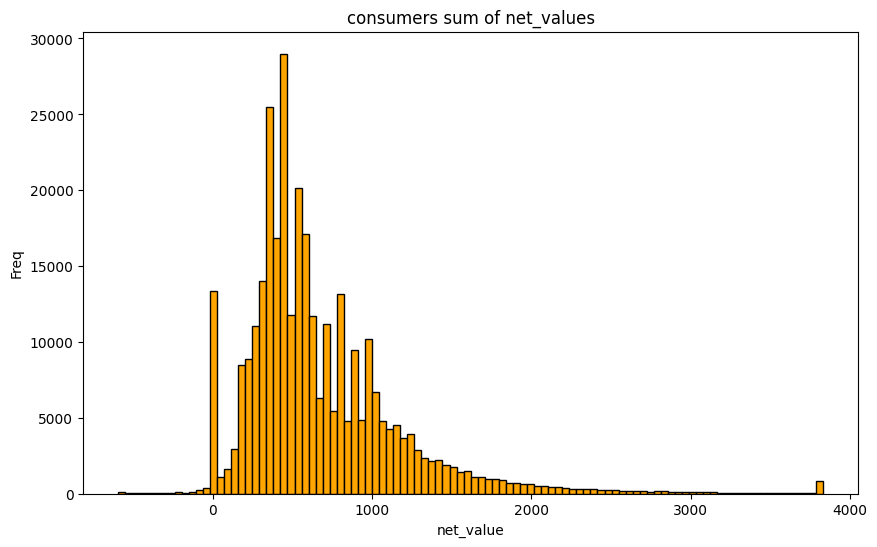

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

df = orders[orders["consumer_id"].notnull()]
df = df.groupby(["consumer_id"]).agg(
    net_value = pd.NamedAgg(column="net_value_dkk", aggfunc="sum")
).reset_index()
# Plot histogram for the numerical column 'value'
q1 = df["net_value"].quantile(0.00025)
q3 = df["net_value"].quantile(0.9975)

# Cap net_values outside the thresholds
df["net_value"] = df["net_value"].clip(lower=q1, upper=q3)

# Plot histogram
plt.figure(figsize=(10, 6))
df["net_value"].hist(bins=100, color='orange', edgecolor='black')
plt.xlabel('net_value')
plt.ylabel('Freq')
plt.title('consumers sum of net_values')
plt.grid(False)
plt.show()

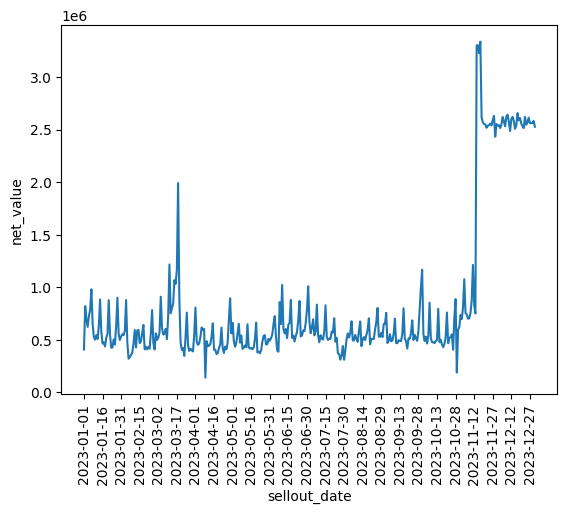

In [103]:
import matplotlib.pyplot as plt 
import seaborn as sns

df = orders.groupby(["sellout_date"]).agg(
    net_value = pd.NamedAgg(column="net_value_dkk", aggfunc="sum")
).reset_index()

df = df.sort_values(by="sellout_date", ascending=True)

# plt.figure(figsize=(24, 6))
sns.lineplot(data=df, x="sellout_date", y="net_value")
plt.xticks(ticks=plt.xticks()[0][::15], rotation=90)
plt.show()

In [132]:
df = orders[orders["consumer_id"].notnull()]
df = df.groupby(["consumer_id"]).agg(
    order_count = pd.NamedAgg(column="order_id", aggfunc="nunique")
).reset_index()
q1 = df["order_count"].quantile(0.00025)
q3 = df["order_count"].quantile(0.9975)
df["order_count"] = df["order_count"].clip(lower=q1, upper=q3)
df.sort_values(by="order_count", ascending=False).groupby(["order_count"]).count().reset_index()

,order_count,consumer_id
0,1,304253
1,2,13078
2,3,1743


In [135]:
df = final_df[(final_df["consumer_id"].notnull())&(final_df["product_id"].notnull())]
df = df.groupby(["consumer_id"]).agg(
    product_count = pd.NamedAgg(column="product_id", aggfunc="nunique")
).reset_index()
q1 = df["product_count"].quantile(0.00025)
q3 = df["product_count"].quantile(0.9975)
df["product_count"] = df["product_count"].clip(upper=q3)
df.sort_values(by="product_count", ascending=False).groupby(["product_count"]).count().reset_index()

,product_count,consumer_id
0,1,187228
1,2,66718
2,3,40533
3,4,13207
4,5,5042
5,6,2480
6,7,1063
7,8,587
8,9,976


In [136]:
df = final_df[final_df["consumer_id"].notnull()]
df = df.groupby(["consumer_id"]).agg(
    sellout_date_count = pd.NamedAgg(column="sellout_date", aggfunc="nunique")
).reset_index()
q1 = df["sellout_date_count"].quantile(0.00025)
q3 = df["sellout_date_count"].quantile(0.9975)
df["sellout_date_count"] = df["sellout_date_count"].clip(upper=q3)
df.sort_values(by="sellout_date_count", ascending=False).groupby(["sellout_date_count"]).count().reset_index()

,sellout_date_count,consumer_id
0,1,304552
1,2,12831
2,3,1691
